In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
dataset=pd.read_csv('./cannabisGrowthRaw2020.csv')

#Combine Classes
dataset.Utility = [x if x == 'best' else 'other' for x in dataset.Utility]
dataset.head()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm,Utility
0,1642.0,20.0,11.0,43.0,4.0,3.0,4.0,4.0,4.0,other
1,1606.0,14.0,10.0,97.0,5.0,4.0,4.0,4.0,3.0,best
2,1471.0,11.0,7.0,54.0,2.0,3.0,3.0,4.0,3.0,other
3,1724.0,16.0,10.0,76.0,4.0,3.0,4.0,4.0,4.0,other
4,2255.0,16.0,12.0,97.0,4.0,3.0,4.0,3.0,3.0,other


In [3]:
#Summary of N/A Values
dataset.isnull().sum()

PMCno        14
DBH           2
Ht            2
Surv        188
Vig         138
Ins_res     138
Stem_Fm     138
Crown_Fm    138
Brnch_Fm    138
Utility       0
dtype: int64

In [4]:
#Replace NA with Mean 
dataset["PMCno"].fillna(dataset["PMCno"].mean(), inplace=True)
dataset["DBH"].fillna(dataset["DBH"].mean(), inplace=True)
dataset["Ht"].fillna(dataset["Ht"].mean(), inplace=True)
dataset["Surv"].fillna(dataset["Surv"].mean(), inplace=True)
dataset["Vig"].fillna(dataset["Vig"].mean(), inplace=True)
dataset["Ins_res"].fillna(dataset["Ins_res"].mean(), inplace=True)
dataset["Stem_Fm"].fillna(dataset["Stem_Fm"].mean(), inplace=True)
dataset["Crown_Fm"].fillna(dataset["Crown_Fm"].mean(), inplace=True)
dataset["Brnch_Fm"].fillna(dataset["Brnch_Fm"].mean(), inplace=True)
dataset.reset_index(drop = True)

#Summary of N/A Values
dataset.isnull().sum()

PMCno       0
DBH         0
Ht          0
Surv        0
Vig         0
Ins_res     0
Stem_Fm     0
Crown_Fm    0
Brnch_Fm    0
Utility     0
dtype: int64

In [5]:
#Show Key Statistics
dataset.describe()

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,2136.977366,75.865518,9.674565,62.059579,3.159520,2.966417,3.083208,3.282159,2.905547
std,645.567229,1613.402976,4.294270,30.116144,0.991306,0.797786,0.723531,0.741045,0.772566
min,1.000000,0.580000,1.000000,1.500000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1595.000000,8.600000,6.155000,41.000000,3.000000,2.500000,3.000000,3.000000,2.500000
50%,2255.000000,15.000000,9.330000,62.059579,3.000000,3.000000,3.000000,3.282159,3.000000
75%,2655.000000,22.000000,12.300000,88.000000,4.000000,3.500000,3.500000,4.000000,3.000000
max,3537.000000,45452.000000,24.000000,108.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# EDA
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
dataset2 = pp.ProfileReport(dataset)
dataset2.to_file('Cannabis.html')
display(IFrame('Cannabis.html', width=900, height=350))

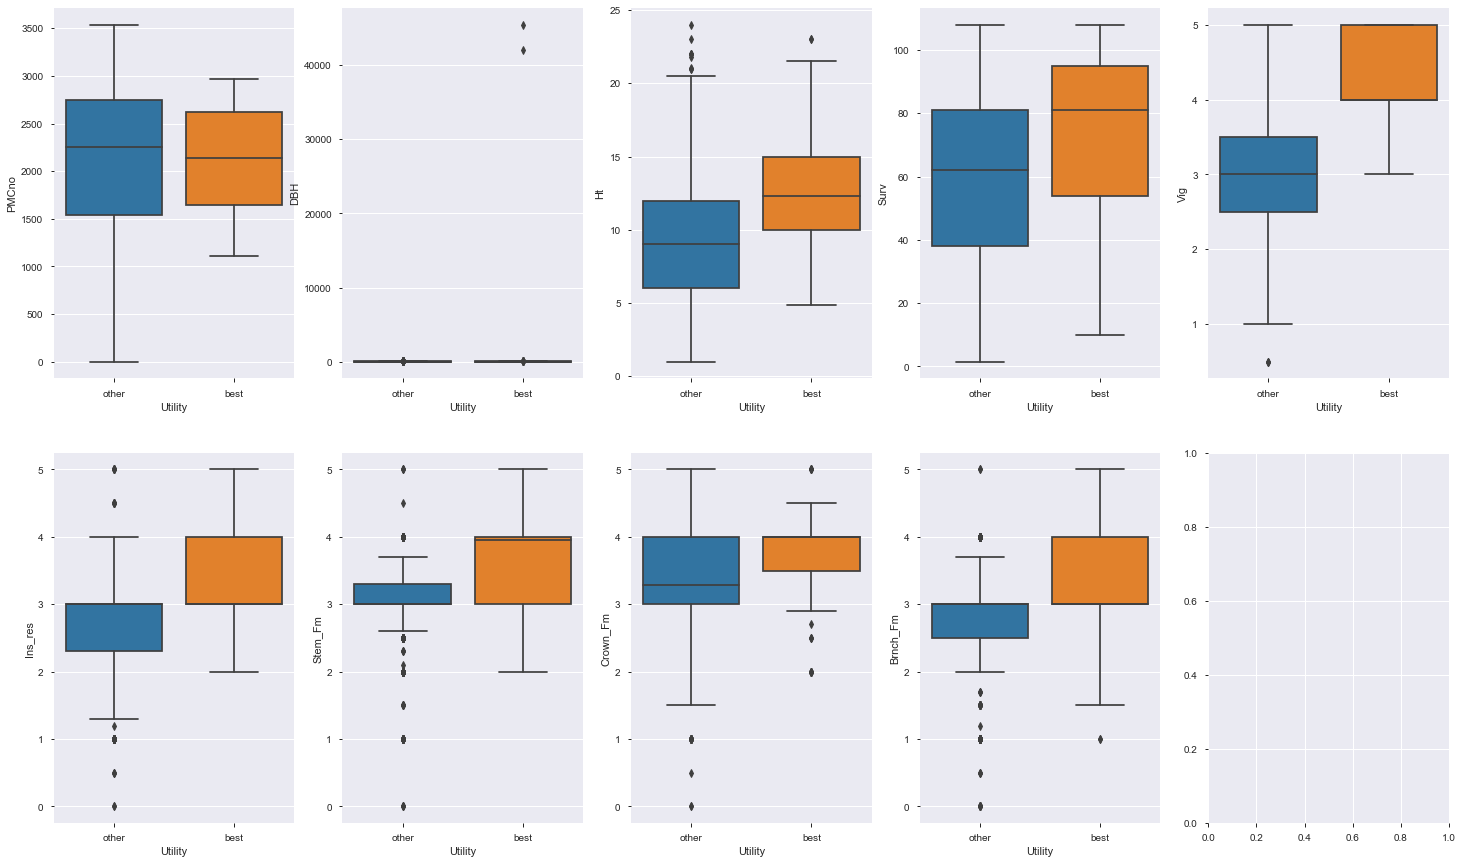

In [7]:
# Boxplot of Features

fig,ax=plt.subplots(nrows=2 ,ncols=5)

sns.boxplot(data=dataset,y='PMCno',x='Utility',ax=ax[0,0])
sns.boxplot(data=dataset,y='DBH',x='Utility',ax=ax[0,1])
sns.boxplot(data=dataset,y='Ht',x='Utility',ax=ax[0,2])
sns.boxplot(data=dataset,y='Surv',x='Utility',ax=ax[0,3])
sns.boxplot(data=dataset,y='Vig',x='Utility',ax=ax[0,4])
sns.boxplot(data=dataset,y='Ins_res',x='Utility',ax=ax[1,0])
sns.boxplot(data=dataset,y='Stem_Fm',x='Utility',ax=ax[1,1])
sns.boxplot(data=dataset,y='Crown_Fm',x='Utility',ax=ax[1,2])
sns.boxplot(data=dataset,y='Brnch_Fm',x='Utility',ax=ax[1,3])

fig.set_figwidth(25)
fig.set_figheight(15)

In [8]:
#Tukey Method to identify outliers
# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(dataset.drop('Utility', axis=1),0,list(dataset.drop('Utility', axis=1)))
dataset.drop('Utility', axis=1).loc[Outliers_to_drop]

,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
390,1.0,7.000000,8.000000,81.000000,3.00000,3.000000,3.000000,3.000000,3.000000
403,1.0,13.000000,11.000000,68.000000,3.00000,4.000000,3.000000,3.000000,3.000000
423,1.0,10.000000,10.000000,54.000000,3.00000,4.000000,3.000000,3.000000,3.000000
1126,1.0,6.770000,7.190000,75.000000,3.00000,3.000000,2.700000,3.000000,3.000000
1139,1.0,11.880000,9.810000,63.000000,3.00000,4.000000,2.500000,2.500000,2.500000
1159,1.0,9.120000,9.670000,50.000000,3.00000,4.000000,3.000000,3.000000,3.000000
41,1644.0,43.000000,15.000000,62.059579,5.00000,4.000000,4.000000,3.000000,2.000000
52,1645.0,43.000000,11.000000,62.059579,4.00000,5.000000,3.000000,3.000000,1.000000
201,1265.0,75.865518,9.674565,62.059579,3.00000,2.000000,1.000000,1.000000,1.000000
287,2620.0,58.000000,5.000000,108.000000,3.00000,4.000000,3.000000,3.000000,3.000000


In [9]:
#Create New Dataset without Outliers
good_data=dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 10 columns):
PMCno       875 non-null float64
DBH         875 non-null float64
Ht          875 non-null float64
Surv        875 non-null float64
Vig         875 non-null float64
Ins_res     875 non-null float64
Stem_Fm     875 non-null float64
Crown_Fm    875 non-null float64
Brnch_Fm    875 non-null float64
Utility     875 non-null object
dtypes: float64(9), object(1)
memory usage: 68.4+ KB


In [10]:
# EDA
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
good_data2 = pp.ProfileReport(good_data)
good_data2.to_file('Cannabis.html')
display(IFrame('Cannabis.html', width=900, height=350))

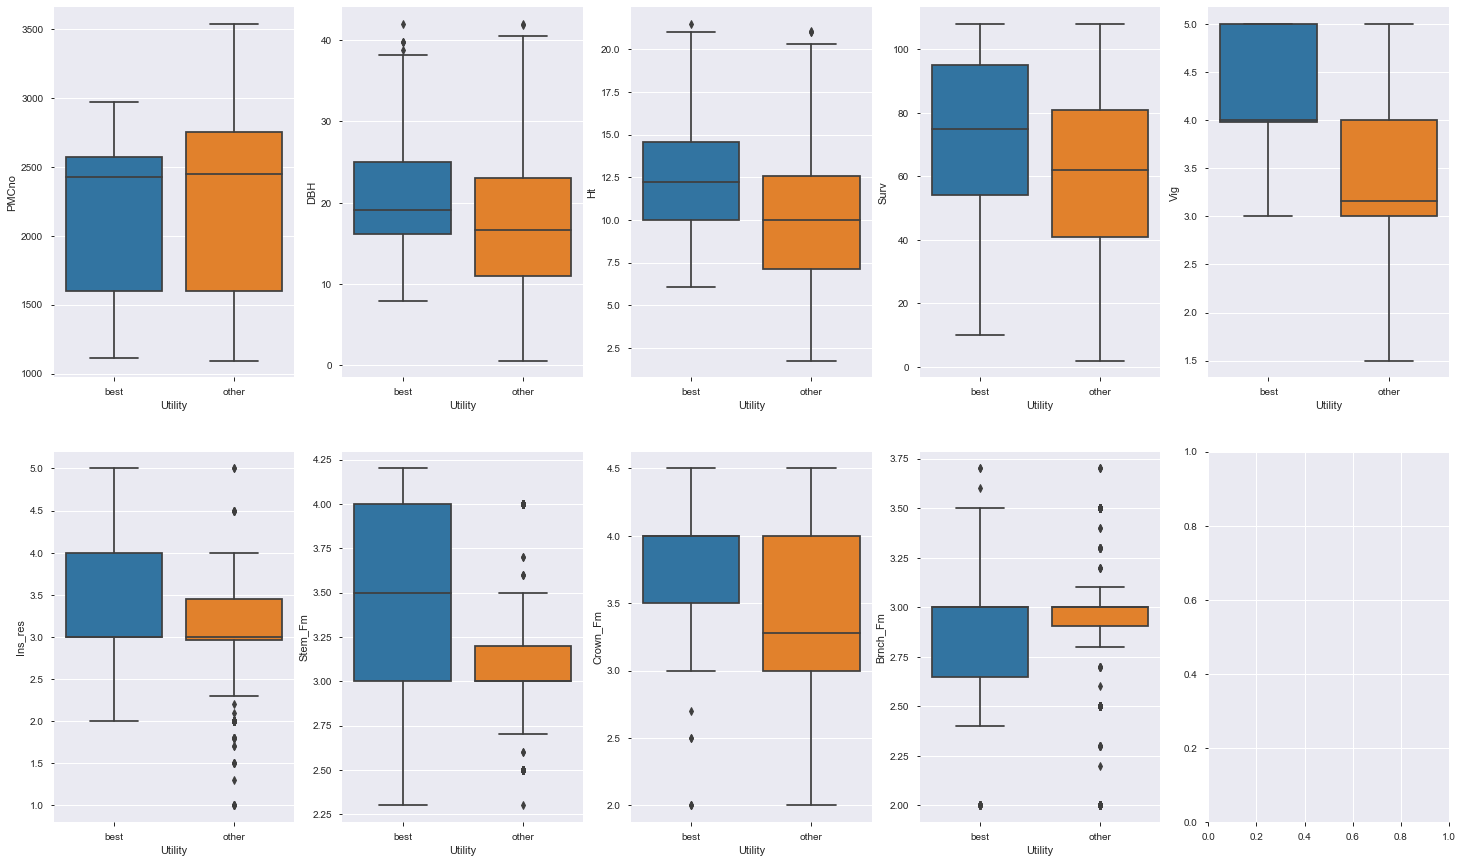

In [11]:
# Boxplot of Features

fig,ax=plt.subplots(nrows=2 ,ncols=5)

sns.boxplot(data=good_data,y='PMCno',x='Utility',ax=ax[0,0])
sns.boxplot(data=good_data,y='DBH',x='Utility',ax=ax[0,1])
sns.boxplot(data=good_data,y='Ht',x='Utility',ax=ax[0,2])
sns.boxplot(data=good_data,y='Surv',x='Utility',ax=ax[0,3])
sns.boxplot(data=good_data,y='Vig',x='Utility',ax=ax[0,4])
sns.boxplot(data=good_data,y='Ins_res',x='Utility',ax=ax[1,0])
sns.boxplot(data=good_data,y='Stem_Fm',x='Utility',ax=ax[1,1])
sns.boxplot(data=good_data,y='Crown_Fm',x='Utility',ax=ax[1,2])
sns.boxplot(data=good_data,y='Brnch_Fm',x='Utility',ax=ax[1,3])

fig.set_figwidth(25)
fig.set_figheight(15)

Class Split
other    763
best     112
Name: Utility, dtype: int64


Text(0, 0.5, 'Count')

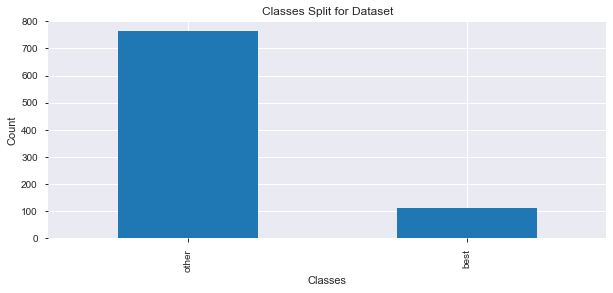

In [12]:
# Class Balance
print('Class Split')
print(good_data['Utility'].value_counts())
good_data['Utility'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [13]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(good_data,0.5)
print('Correlated columns @ 0.5:', col)

Correlated columns @ 0.5: [('Ht', 'DBH')]


In [14]:
#Create x and y variables
x = good_data.drop('Utility', axis=1).values
Y = good_data['Utility'].values

#Create Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Import Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [15]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == "other").sum()
num_ones = (y_train_smt == "best").sum()
print('Other -',  num_zeros)
print('Best -',  num_ones)

Train Data - Class Split
Other - 610
Best - 610


In [16]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression())]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict)) 


Estimator: LDA
[[22  0]
 [55 98]]
              precision    recall  f1-score   support

        best       0.29      1.00      0.44        22
       other       1.00      0.64      0.78       153

    accuracy                           0.69       175
   macro avg       0.64      0.82      0.61       175
weighted avg       0.91      0.69      0.74       175


Estimator: QDA
[[ 20   2]
 [ 42 111]]
              precision    recall  f1-score   support

        best       0.32      0.91      0.48        22
       other       0.98      0.73      0.83       153

    accuracy                           0.75       175
   macro avg       0.65      0.82      0.66       175
weighted avg       0.90      0.75      0.79       175


Estimator: LogReg
[[ 22   0]
 [ 53 100]]
              precision    recall  f1-score   support

        best       0.29      1.00      0.45        22
       other       1.00      0.65      0.79       153

    accuracy                           0.70       175
   macro avg

In [17]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='liblinear',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1', 'l2']}
modelpara.insert(2,param_gridlogreg)

In [18]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
x_shuffle, y_shuffle = shuffle(x_train2, y_train_smt)

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_shuffle, 
                                                            y=y_shuffle,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()

LDA Learning Curve


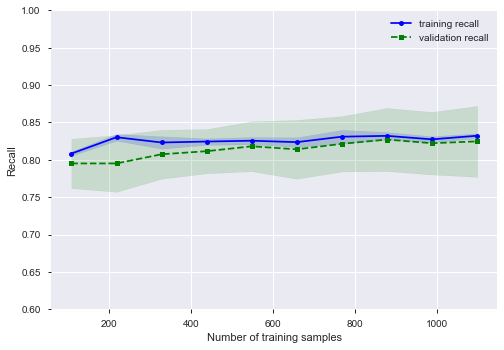


 QDA Learning Curve


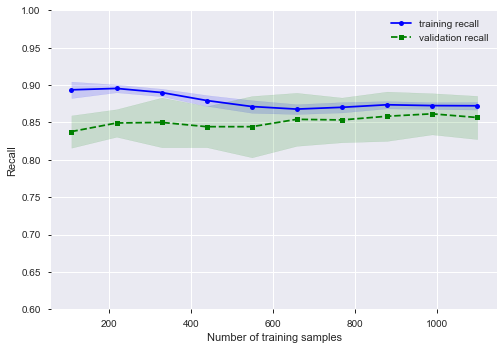


 Logistic Regression Learning Curve


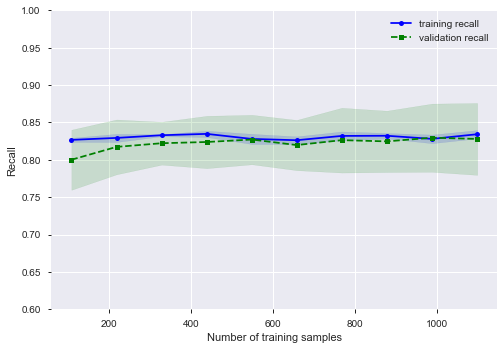

In [19]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
LDA 0.83 +/- 0.03
QDA 0.86 +/- 0.03
Log Reg 0.83 +/- 0.03




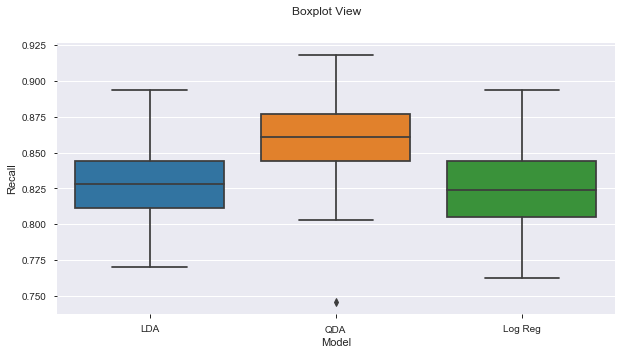

In [20]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train2,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [21]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=1, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train2, y_train_smt)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, Y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['best','other']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')
    
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Best Parameters: {'clf__solver': 'svd'}

 [[22  0]
 [55 98]]

               precision    recall  f1-score   support

        best       0.29      1.00      0.44        22
       other       1.00      0.64      0.78       153

    accuracy                           0.69       175
   macro avg       0.64      0.82      0.61       175
weighted avg       0.91      0.69      0.74       175


NestedCV Accuracy(weighted) :0.88 +/-0.02 
NestedCV Precision(weighted) :0.85 +/-0.06 
NestedCV Recall(weighted) :0.88 +/-0.02 


ROC Curve


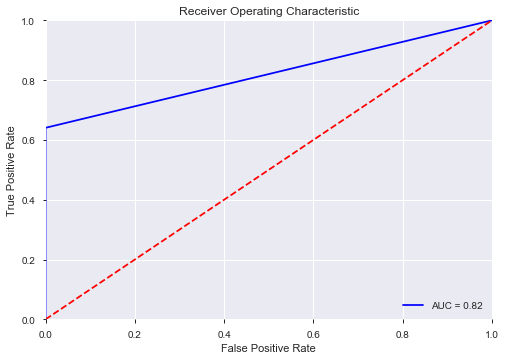


Optimized Model

Model Name: QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Best Parameters: {}

 [[ 20   2]
 [ 42 111]]

               precision    recall  f1-score   support

        best       0.32      0.91      0.48        22
       other       0.98      0.73      0.83       153

    accuracy                           0.75       175
   macro avg       0.65      0.82      0.66       175
weighted avg       0.90      0.75      0.79       175


NestedCV Accuracy(weighted) :0.85 +/-0.03 
NestedCV Precision(weighted) :0.85 +/-0.04 
NestedCV Recall(weighted) :0.85 +/-0.03 


ROC Curve


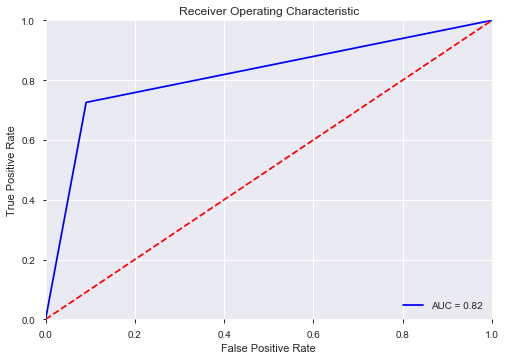


Optimized Model

Model Name: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Best Parameters: {'clf__C': 10, 'clf__penalty': 'l2'}

 [[ 22   0]
 [ 52 101]]

               precision    recall  f1-score   support

        best       0.30      1.00      0.46        22
       other       1.00      0.66      0.80       153

    accuracy                           0.70       175
   macro avg       0.65      0.83      0.63       175
weighted avg       0.91      0.70      0.75       175


NestedCV Accuracy(weighted) :0.78 +/-0.07 
NestedCV Precision(weighted) :0.88 +/-0.02 
NestedCV Recall(weighted) :0.78 +/-0.07 


ROC Curve


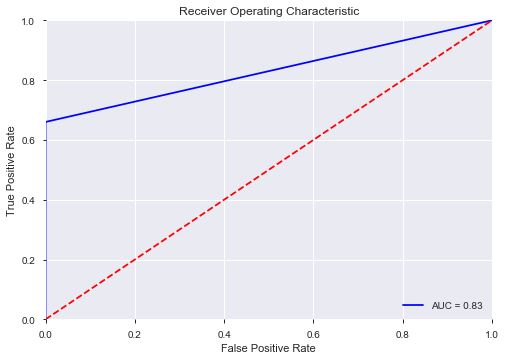

In [22]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

LDA

Permutation Importance




Weight,Feature
0.1303 ± 0.0606,Vig
0.0446 ± 0.0454,Crown_Fm
0.0229 ± 0.0204,PMCno
0.0149 ± 0.0155,Ht
0.0046 ± 0.0222,DBH
0.0034 ± 0.0056,Surv
-0.0011 ± 0.0086,Brnch_Fm
-0.0034 ± 0.0186,Stem_Fm
-0.0046 ± 0.0046,Ins_res


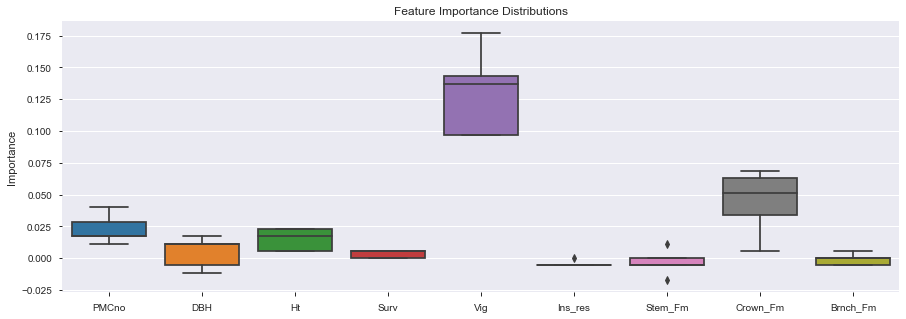

QDA

Permutation Importance




Weight,Feature
0.0503 ± 0.0405,Vig
0.0343 ± 0.0451,DBH
0.0229 ± 0.0415,Ht
0.0149 ± 0.0328,Crown_Fm
0.0103 ± 0.0310,Ins_res
0.0080 ± 0.0366,PMCno
-0.0023 ± 0.0303,Stem_Fm
-0.0103 ± 0.0293,Brnch_Fm
-0.0137 ± 0.0294,Surv


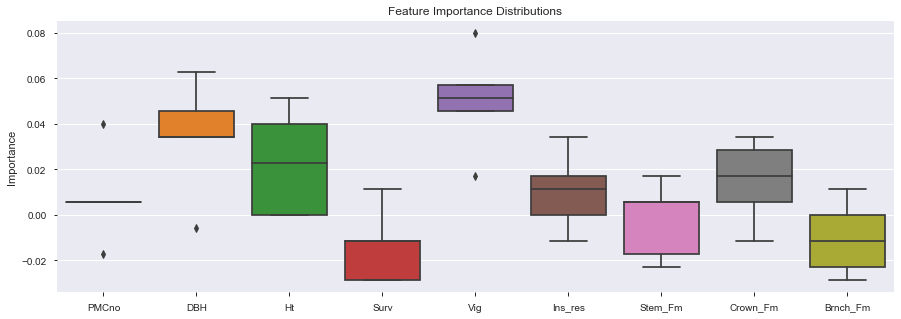

Log Reg

Permutation Importance




Weight,Feature
0.1189 ± 0.0687,Vig
0.0366 ± 0.0387,Crown_Fm
0.0069 ± 0.0284,PMCno
0.0023 ± 0.0171,Ht
-0.0011 ± 0.0168,Surv
-0.0011 ± 0.0086,DBH
-0.0023 ± 0.0155,Stem_Fm
-0.0023 ± 0.0056,Ins_res
-0.0046 ± 0.0086,Brnch_Fm


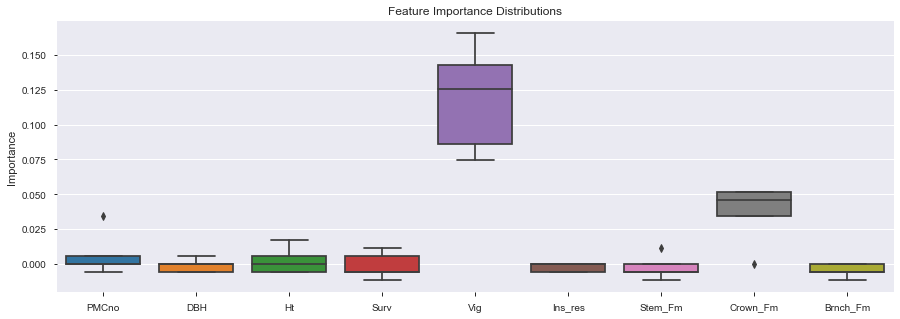

In [23]:
#Next Step - Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train_smt),random_state=100).fit(x_test2,y_test)
    features=good_data.drop('Utility', axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=good_data.drop('Utility', axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()